# Plot Maker
- creating some plots to use for documentation
- normally I'd just include the notebook and code
- but for more of a graphic to use in Markdown, the code might not be relevant

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

## R-Squared

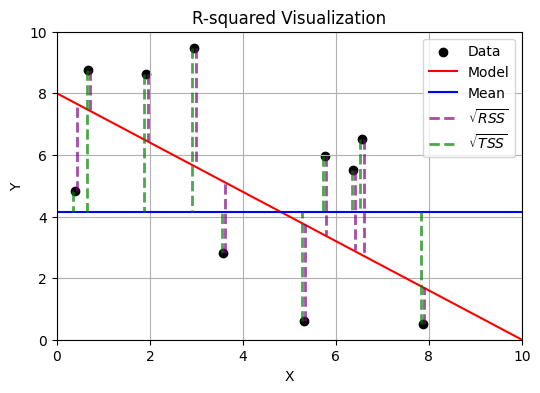

In [ ]:
# Generate random scatter points
np.random.seed(17)
x = np.random.rand(10) * 10
y = np.random.rand(10) * 10


# make a function to use as a "model"
def model(x):
    return 8 - 0.8 * x


# Plot scatter points
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color="black", label="Data")

# Add two lines
x_line = np.linspace(0, 1, 10) * 10
y_modl = model(x_line)
y_mean = np.array([x.mean() for xi in x_line])
plt.plot(x_line, y_modl, color="red", label="Model")
plt.plot(x_line, y_mean, color="blue", label="Mean")

# Add vertical lines from each scatter point to the first line
y1_label = r"$\sqrt{RSS}$"
y2_label = r"$\sqrt{TSS}$"
for xi, yi in zip(x, y):
    # find the point above or below the scatter point on each line
    y_vert_modl = model(xi)
    y_vert_mean = x.mean()
    # plot the vertical line (shift them so they don't overlap)
    plt.plot(
        [xi + 0.035, xi + 0.035],
        [yi, y_vert_modl],
        color="purple",
        linestyle="--",
        alpha=0.7,
        label=y1_label,
        linewidth=2,
    )
    plt.plot(
        [xi - 0.035, xi - 0.035],
        [yi, y_vert_mean],
        color="green",
        linestyle="--",
        alpha=0.7,
        label=y2_label,
        linewidth=2,
    )
    # only label the first vertical line to keep from crowding the legend
    y1_label = None
    y2_label = None

# add some labels and a legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("R-squared Visualization")
plt.legend()
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)

# show and save the figure
plt.savefig("r_squared_visualization.png")
plt.show()

## RMSE and RMSLE

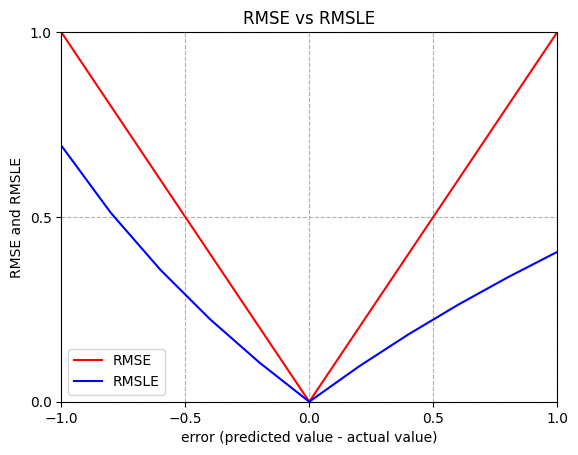

In [ ]:
def RMSE(y_true, y_pred):
    """Calculate Root Mean Squared Error."""
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


def RMSLE(y_true, y_pred):
    """Calculate Root Mean Squared Logarithmic Error."""
    return np.sqrt(np.mean((np.log(y_true + 1) - np.log(y_pred + 1)) ** 2))
    # the correct way to calculate RMSLE is to use log1p to improve precision when y is small
    # but that's less clear so I'm skipping it for this illustration
    # return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred)) ** 2))


# generate input data
y_true = [1] * 11  # true will be horizontal
y_pred = np.linspace(0, 2, 11)  # predicted will be sometimes under and sometimes over
# calculate the error
err = y_pred - y_true
# caclulate RMSE and RMSLE
rmse = [RMSE(t, p) for t, p in zip(y_true, y_pred)]
rmsle = [RMSLE(t, p) for t, p in zip(y_true, y_pred)]

# Plot the errors
# plt.plot(err, y_true, color='green', label='actual value')
# plt.plot(err, y_pred, color='purple', label='predicted value')
plt.plot(err, rmse, color="red", label="RMSE")
plt.plot(err, rmsle, color="blue", label="RMSLE")

# add some labels and a legend
plt.xlabel("error (predicted value - actual value)")
plt.ylabel("RMSE and RMSLE")
plt.title("RMSE vs RMSLE")
plt.legend()
plt.grid(which="both", linestyle="--")
plt.xlim(-1, 1)
plt.ylim(0, 1)
# plt.xticks(np.arange(-1, 1.1, 0.1), minor=True)
plt.xticks(np.arange(-1, 1.1, 0.5))
plt.yticks(np.arange(0, 1.1, 0.5))

# show and save the figure
plt.savefig("rmse_vs_rmsle.png")
plt.show()